## Predicting House Price with Machine Learning Models
**Bashini Mahaarachchi**

In this project, I am working with historical housing pricing data to predict unknown house prices for home buyers and home sellers based on different attributes.This approach would be very valuable for a real estate agent who could make use of the different attribute information provided on a daily basis and to a person who is planning to buy a house in a particular place to stay away from fraudulent deals.

This dataset contains house sale prices for King County, USA which includes Seattle. It includes information of homes sold between May 2014 and May 2015. This dataset contains19 house features plus the price and the ID columns, along with 21613 observations. Even though this would be based on this specific geography, I assume my model to generalize over any other geography as I believe these attribute features that I consider can be found anywhere.

## Importing data and libraries

Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import randint
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, explained_variance_score, median_absolute_error, r2_score, fbeta_score
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score,learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import clone
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from matplotlib import pyplot as plt
from xgboost import XGBRegressor, plot_importance

Importing dataset and labels.

In [2]:
housing_data = pd.read_csv("kc_house_data.csv")
housing_data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


## Preprocessing data

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


It can be seen that all the selected data for the analysis are numerical. Now I am going to see if the data has any missing values.

In [4]:
housing_data.isnull().sum().sum()

0

Dataset does not have any missing values.

Now I am going to remove ID and Date columns from the dataset since they are non-informative attributes I will not be using them in the analysis.

In [5]:
housing_data = housing_data.drop(['id', 'date'],axis=1)

## Visualising Data

To get a feel about how the various features are correlated, specially against the price variable first I am going to generate the co-relation heatmap between the numerical variables.

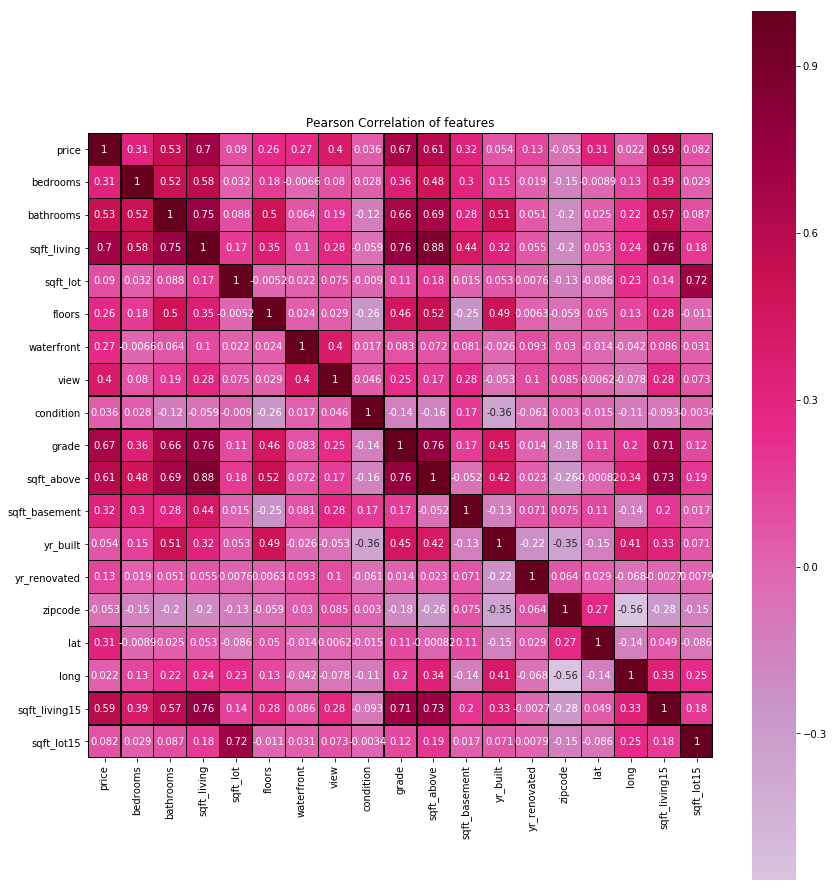

In [6]:
plt.figure(figsize=(14, 16))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(housing_data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap='PuRd', linecolor='k', annot=True, center = 0.0)

From the co-relation heat map, it can be seen that there is a linear distribution between some of the two variables. 

## Further analysis against Price

Now  I am going to plot pair plots of *sqft_above*,*price*,*sqft_living*,*bathrooms*,*grade* (features which are highly co-related with the price) to see how the data is distributed with respect to the price as well as the grade of the house. Here I use House grade as the hue because I wanted to see if the grade attribute indicate any clear linear relationship with other two variables together.

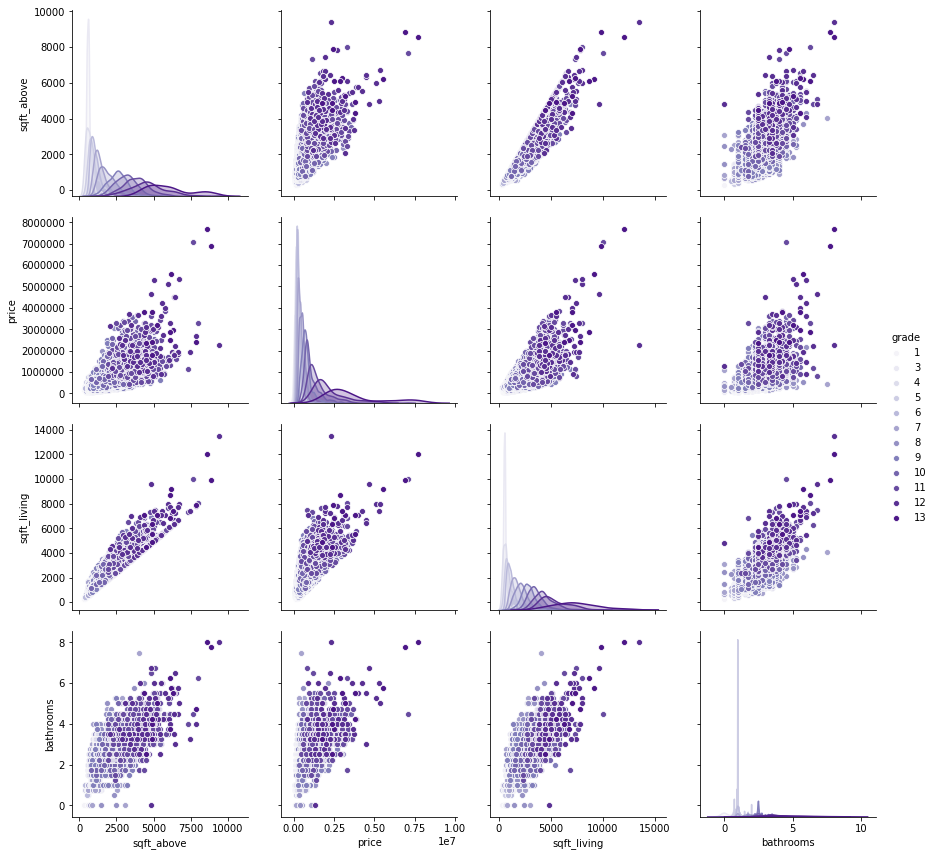

In [7]:
plot_a = sns.pairplot(data=housing_data[['sqft_above','price','sqft_living','bathrooms','grade']],
                      vars=housing_data[['sqft_above','price','sqft_living','bathrooms']],
                      hue='grade',size=3,palette='Purples')

By looking at the pair plots it can be said that when the value of each variable inceases the price as well as the grade of the house inceases. 

Now I am going to take a look at the price variable.

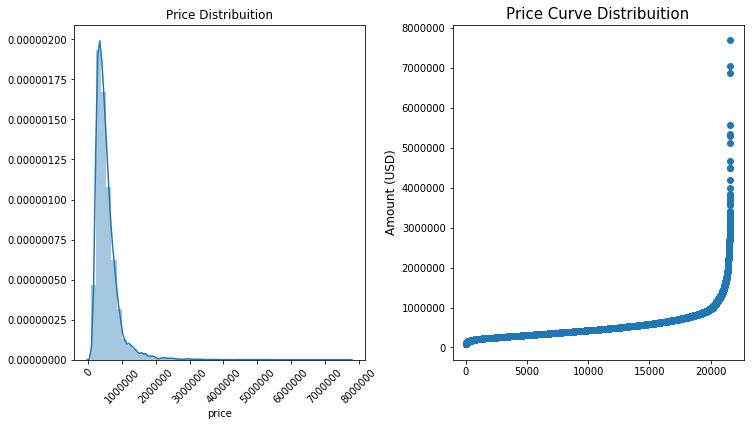

In [8]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.title('Price Distribuition')
plt.xticks(rotation = 45)
sns.distplot(housing_data['price'])

plt.subplot(122)
g1 = plt.scatter(range(housing_data.shape[0]), np.sort(housing_data.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount (USD)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5, top = 0.9)
plt.show()

By looking at the distribution of price variable, it can be said that data is highly right skewed and **~1600 data points lie within the price range of 1 million to 8 million which is about 7.5% of the total sample and the remaining 92.5% has housing prices below 1 million**.

## Data Analysis

My aim here is to fit different models for data and evalueate their performance. In doing I am planing to evaluate the models by R2 scores of all models on the test set and finally decide on which model to be selected for testing.

Other than the feature *'zipcode'* other features are quantitative. Therefore before hot encode the 'zipcode' feature I am going to how the zipcode values are distributed.

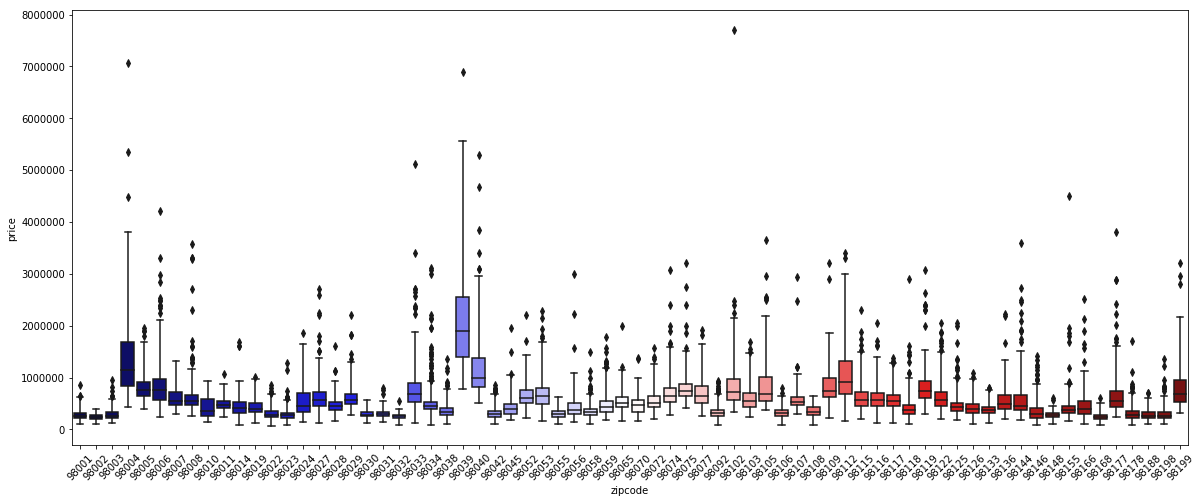

In [9]:
# code edited
fig = plt.subplots(figsize=(20,8))
sns.boxplot(x='zipcode', y= 'price',data=housing_data, palette='seismic',whis=3)
plt.xticks(rotation = 45)
plt.show()

It can be seen that price does not vary much depending on the zipcode alone. Therefore I am going to remove zipcode from the dataset.

Since the dataset is fairly large and the price distribution within each zip-code seem to be unique, I assume using this as a model attribute will help models to understand these price-vs zipcode behavior better, therefore will be using for the modeling stage.

Therefore I am going to one-hot-encode the zip-codes and create a set of additional variables. I do this because, keeping these as strings would cause issues if I try to fit linear models and if I label encode them, it would provide a 'meaningful ordering'  which is not the true case.

In [10]:
housing_data_new = pd.concat([housing_data,pd.get_dummies(housing_data['zipcode'], prefix='zip')],axis=1)
housing_data_new = housing_data_new.drop(['zipcode'],axis=1)

### Clustering on Longitude and Latitude

Now I am going to take a look at the longitude and the latitude data.I am going to clusture the Longitudes and the Latitudes, because using the raw values in the model doesn't make much sense. For spatial data, the DBSCAN algorithm is far superior than the k-means algorithm. Thesefore I am going to use DBSCAN algorithm.

Fist I make a new matrix with the cordinates.

In [11]:
coords = housing_data_new.as_matrix(columns=['lat', 'long'])

Next I compute DBSCAN. The epsilon parameter is the max distance (I used 1 km in this) that points can be from each other to be considered a cluster.The min_samples parameter is the minimum cluster size (everything else gets classified as noise). I am setting it to 3 so that every clusture has at least 3 data points.

In [12]:
kms_per_radian = 6371.0088
epsilon = 1/ kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine', leaf_size=20).fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 55


Following loop returns the center-most point from a cluster by taking a set of points (i.e., a cluster) and returning the point within it that is nearest to some reference point (in this case, the cluster’s centroid):

In [13]:
lats = []
lons = []

for cluster in clusters:
    if len(cluster)>0:
        centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
        centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
        lats.append(tuple(centermost_point)[0])
        lons.append(tuple(centermost_point)[1])

rep_points2 = pd.DataFrame({'long':lons, 'lat':lats})

Now I pull the full row from the original data set where the latitude and longitude columns match the representative point’s latitude and longitude.

In [14]:
rs2 = rep_points2.apply(lambda row: housing_data_new[(housing_data_new['lat']==row['lat']) & (housing_data_new['long']==row['long'])].iloc[0], axis=1)

Now I am plotting the final reduced set of data points versus the original full set to see how they compare.

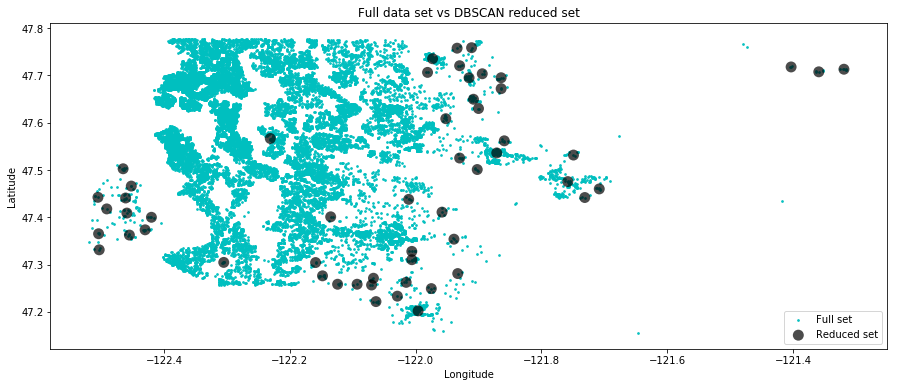

In [15]:
fig, ax = plt.subplots(figsize=[15, 6])
df_scatter = ax.scatter(housing_data_new['long'], housing_data_new['lat'], c='c', alpha=0.9, s=3)
rs_scatter = ax.scatter(rs2['long'], rs2['lat'], c='black', edgecolor='None', alpha=0.7, s=120)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='lower right')
plt.show()

Now I am going to add the clusture lable of each data point to the main dataframe.

In [16]:
housing_data_new['clust'] = cluster_labels

Now I am going to check how the Price vary in each of these clustures.

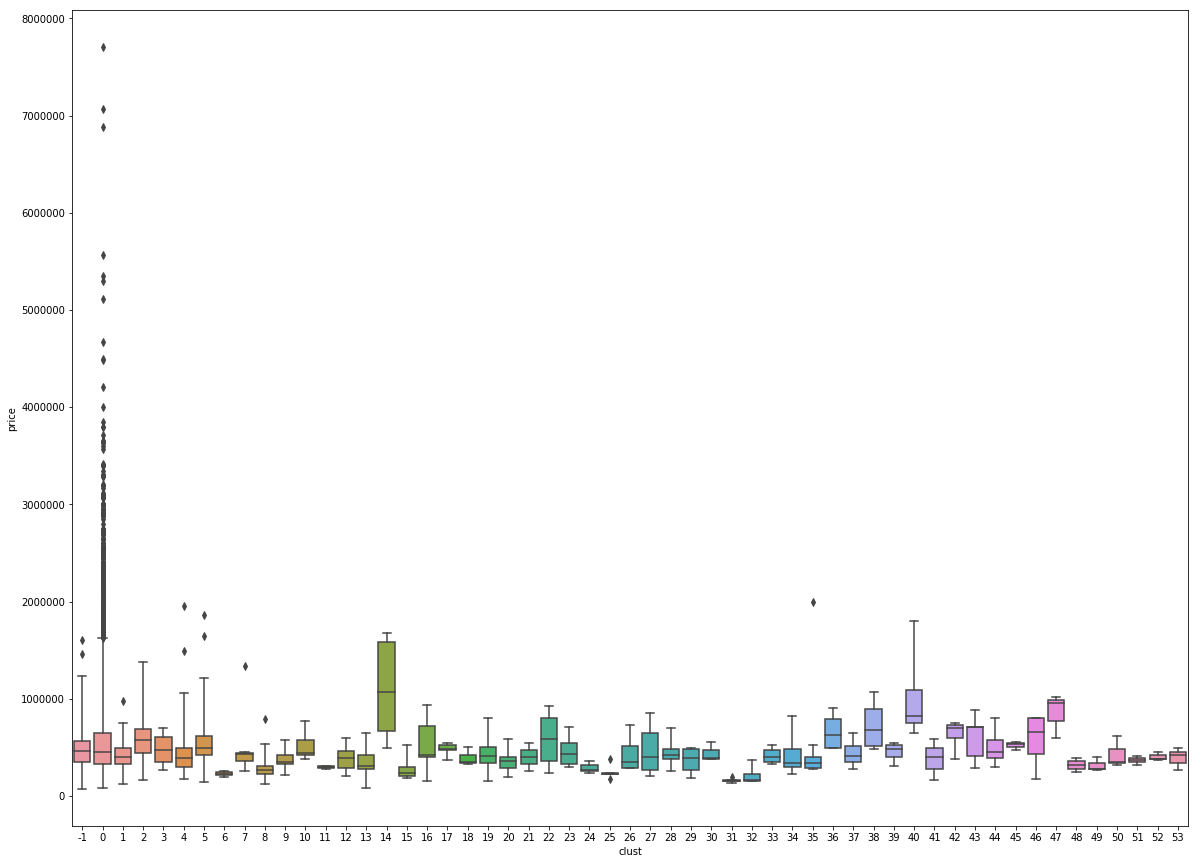

In [17]:
fig = plt.subplots(figsize=(20,15))
sns.boxplot(x='clust', y= 'price', whis=3, data=housing_data_new)
plt.show()

Similar to zipcode, it can be see that the created clusters also showcase some distintion on the price-ranges across clusters. Therefore I am planning to use these new clusters as an input for the models which I am going to build in the modeling stage.

Here also, since the cluster number does not reflect any positional importance, it is needed to one-hot encode these numbers in the models otherwise would assign some type of an importance to these ordering.

In [18]:
housing_data_new2 = pd.concat([housing_data_new,pd.get_dummies(housing_data_new['clust'], prefix='cluster')],axis=1)

I am dropping 'long' and 'lat' variables as I have created clusters using them.

In [19]:
housing_data_new2 = housing_data_new2.drop(['clust'],axis=1)

### Training and test split

Before dividing the data in to training and test sets I am going to seperate out predictor varibales and target variable.

In [20]:
X = housing_data_new2 .drop(axis=0, columns="price")
y = housing_data.price.values

Dividing the data in to training and test sets.

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=1)

### Creating a Pipeline to evaluate the models.

I am going to create a pipeline with the models and a list to store **'r2 values'** to evaluate of their performance later. I use StandardScaler() to standardise data.

In [22]:
R2_score = []
seed = 1

R2_score.append(
                ("M1_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
R2_score.append(
                ("M2_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
R2_score.append(
                ("M3_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

R2_score.append(
                ("M4_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

R2_score.append(
                ("M5_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

R2_score.append(
                ("M6_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
#on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.
                 ])
                )
                )
R2_score.append(
                ("M7_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
#A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of 
#the original dataset and then aggregate their individual predictions.The base estimator is a decision tree.
                 ]))) 

R2_score.append(
                ("M8_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
#The Huber Regressor optimizes the squared loss for the samples where and the absolute loss for the samples 
# and it is a linear classfier
                 ]))) 

R2_score.append(
                ("M9_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

R2_score.append(
                ("M10_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

R2_score.append(
                ("M11_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

R2_score.append(
                ("M12_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

R2_score.append(
                ("M13_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

R2_score.append(
                ("M14_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

R2_score.append(
                ("M15_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

Following is the loop I wrote to pass values to the pipeline and display the mean **'r2'** value of each model.

In [23]:
scoring = 'r2'
n_folds = 7

results, names  = [],[] 

for name, model  in R2_score:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    output = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(output)

M1_Ridge: 0.813974 (+/- 0.008088)
M2_Lasso: 0.772721 (+/- 0.009789)
M3_Elastic: 0.783187 (+/- 0.012528)
M4_SVR: 0.755098 (+/- 0.017364)
M5_RF_reg: 0.855007 (+/- 0.020080)
M6_ET_reg: 0.875302 (+/- 0.005754)
M7_BR_reg: 0.854987 (+/- 0.018280)
M8_Hub-Reg: 0.791214 (+/- 0.010990)
M9_BayRidge: 0.814061 (+/- 0.008207)
M10_XGB_reg: 0.874738 (+/- 0.007060)
M11_DT_reg: 0.723755 (+/- 0.026007)
M12_KNN_reg: 0.816838 (+/- 0.008986)
M13_Gboost-Reg: 0.873176 (+/- 0.005702)
M14_RFR_PCA: 0.694819 (+/- 0.019567)
M15_XGBR_PCA: 0.720289 (+/- 0.017511)


Plotting the results.

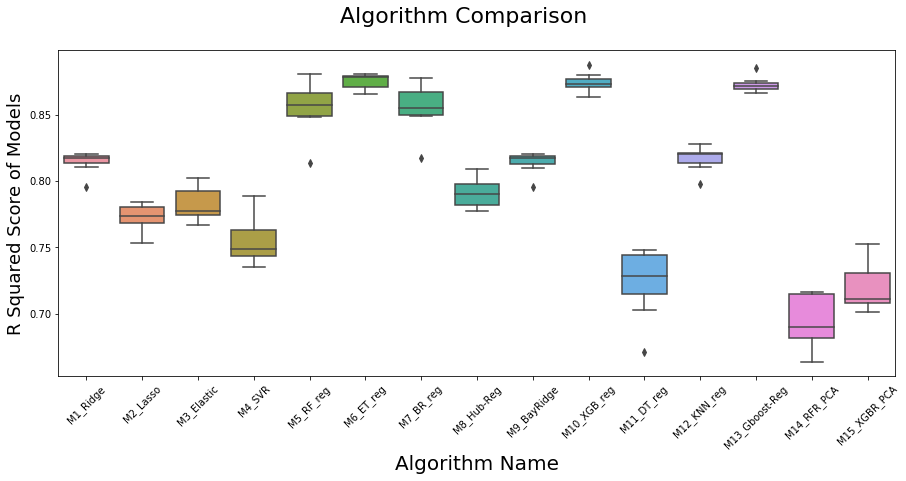

In [24]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithm Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

It is evident that there are 5 models with r2 score greater than 0.85 .Next I am going to set hyper parameters to the best models and try increase this 'r2' score.

### Testing the best models

#### 1. XGBRegressor

In [25]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.09, gamma=0, subsample=0.7,
                           colsample_bytree=1, max_depth=8)
xgb.fit(preprocessing.scale(X_train), Y_train)
Y_hat_xgb = xgb.predict(preprocessing.scale(X_test))
xgb.score(preprocessing.scale(X_test),Y_test)

[04:18:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.88279751590166

#### 2. GradientBoostingRegressor

In [26]:
gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', 
             learning_rate=0.2, loss='ls', max_depth=3, 
             max_leaf_nodes=5, min_impurity_decrease=0.0, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,random_state=1,
             n_estimators=100, presort='auto', 
             subsample=1.0, verbose=0)
gbr.fit(preprocessing.scale(X_train), Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=5, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [27]:
Y_hat_gbr = gbr.predict(preprocessing.scale(X_test))
gbr.score(preprocessing.scale(X_test),Y_test)

0.8629282941013622

#### 3.  RandomForest Regressor

In [28]:
classifier = RandomForestRegressor(random_state=3)
classifier.fit(preprocessing.scale(X_train), Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [29]:
# Predicting the test set results
Y_hat_rf = classifier.predict(preprocessing.scale(X_test))

print(r2_score(Y_test, Y_hat_rf))

0.8495325539116345


#### 4. ExtraTreesRegressor

In [30]:
etr = ExtraTreesRegressor()
etr.fit(preprocessing.scale(X_train), Y_train)
Y_hat_etr = etr.predict(preprocessing.scale(X_test))
print(r2_score(Y_test, Y_hat_etr))

0.8591036110905856


#### 5. BaggingRegressor

In [31]:
br = BaggingRegressor()
br.fit(preprocessing.scale(X_train), Y_train)
Y_hat_br = br.predict(preprocessing.scale(X_test))
print(r2_score(Y_test, Y_hat_br))

0.8569248190589405


### Comparing the model performance

Finally I am going to create a matrix of mean values of the R squared values of the best models before testing on the test set and after testing on the test values.

In [32]:
Compare_results = pd.DataFrame({'XGBRegressor': [results[9].mean(), xgb.score(preprocessing.scale(X_test),Y_test),sqrt(mean_squared_error(Y_test, Y_hat_xgb))], 
                        'GradientBoosting': [results[12].mean(), gbr.score(preprocessing.scale(X_test),Y_test),sqrt(mean_squared_error(Y_test, Y_hat_gbr))],
                        'ExtraTrees': [results[5].mean(), etr.score(preprocessing.scale(X_test),Y_test),sqrt(mean_squared_error(Y_test, Y_hat_etr))],
                        'RandomForest': [results[4].mean(), r2_score(Y_test, Y_hat_rf),sqrt(mean_squared_error(Y_test, Y_hat_rf))],
                        'BaggingRegressor':[ results[6].mean(), br.score(preprocessing.scale(X_test),Y_test),sqrt(mean_squared_error(Y_test, Y_hat_br))]})
Compare_results.rename(index = {0: "R2_on_training",1: "R2_on_test", 2: "RMSE between test and predict"}, inplace = True)

In [33]:
Compare_results

,XGBRegressor,GradientBoosting,ExtraTrees,RandomForest,BaggingRegressor
R2_on_training,0.874738,0.873176,0.875302,0.855007,0.854987
R2_on_test,0.882798,0.862928,0.859104,0.849533,0.856925
RMSE between test and predict,132754.033015,143566.536805,145555.709859,150418.270256,146676.813751


It can be seen that r2 score of all the models have improved on the test values but keeping the same order of increase except for the difference between GradientBoosting and ExtraTrees, but it is also very minimal.

Since ***XGBRegressor*** is giving best results across all metrics, I will be trying to tune hyperparameters of that model as below.

In [34]:
xgb.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.09, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)>

In [47]:
# Creating the hyperparameter grid
param_dic = { "n_estimators": np.arange(100,500,100),
                "min_samples_leaf":np.arange(1,9,3),
                "max_depth":np.arange(6,10,2)}
            
#Instantiating XGBRegressor
XGB_CV = XGBRegressor(random_state=3,objective= 'reg:squarederror')
  
# Instantiating GridSearchCV object 
XGB_cv = GridSearchCV(XGB_CV, cv = 3, param_grid = param_dic)
  
XGB_cv.fit(preprocessing.scale(X_train), Y_train)

Now I am going to predict using the Gridsearched model.

In [48]:
Y_hat_XGB_cv = XGB_cv.predict(preprocessing.scale(X_test))
print(r2_score(Y_test, Y_hat_XGB_cv))

0.8845457748558525

As it can be seen, even after hyper parameter tuning the result has not been improved significantly.

## Further Remarks

Finally I am trying to understand about the errors the final model for that I am plotting the predicted against the actuals.

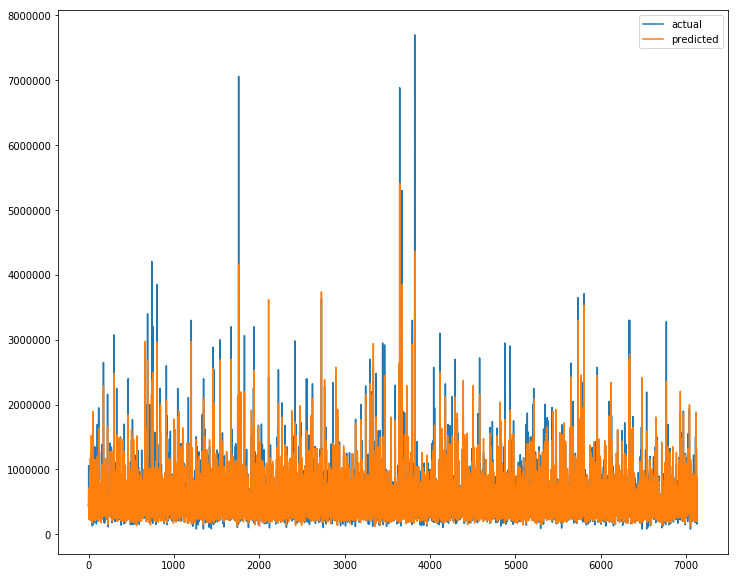

In [49]:
plt.figure(figsize=(12,10))
plt.plot(Y_test,label='actual')
plt.plot(Y_hat_XGB_cv,label = 'predicted')
plt.legend()
plt.show()

Here we can see that, for several cases the model prediction has been LOWER than the true value. And reminding back about the original distribution of the price dataset, it is clear that there is about ~5% of data that exceed 1,000,000 Price point, and it appears that the model is not able to precisely make prediction on these ranges due to the lack of information - outlier behavior of these data-points.

So in order to understand how the model would predict after dropping out these extreme cases, I am going to drop thes points and retrain the model and predict on the test set to see if the RMSE would be lower.

In [51]:
housing_data_new3 = housing_data_new2[housing_data_new2['price'] < 1000000]

In [52]:
housing_data_new3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53
count,20121.000000,20121.000000,20121.000000,20121.000000,2.012100e+04,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,...,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000,20121.000000
mean,466986.581084,3.319567,2.037672,1953.810496,1.451278e+04,1.470976,0.002883,0.161324,3.404254,7.502311,...,0.000497,0.000149,0.000199,0.000099,0.000199,0.000149,0.000149,0.000149,0.000149,0.000149
std,195521.038243,0.910432,0.703034,755.079903,3.999895e+04,0.536332,0.053613,0.617358,0.645515,1.013726,...,0.022288,0.012210,0.014098,0.009970,0.014098,0.012210,0.012210,0.012210,0.012210,0.012210
min,75000.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,313999.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,433000.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,592000.000000,4.000000,2.500000,2410.000000,1.025400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999999.000000,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
X = housing_data_new3.drop(axis=0, columns="price")
y = housing_data_new3.price.values
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [56]:
xgb_2 = XGBRegressor(n_estimators=100, learning_rate=0.09, gamma=0, subsample=0.7,colsample_bytree=1, max_depth=8)
xgb_2.fit(preprocessing.scale(X_train), Y_train)
Y_hat_xgb_2 = xgb_2.predict(preprocessing.scale(X_test))
xgb_2.score(preprocessing.scale(X_test),Y_test)

[04:38:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8769747077064516

In [57]:
sqrt(mean_squared_error(Y_test, Y_hat_xgb_2))

69180.60613508914

It can be seen that, the RMSE score has decreased significantly after removing the outlier - extreme price points. I assume this occurs due to the model not having sufficent information on such price points.

As a next step, it's also possible to convert this regression problem to a classification problem by creating price range buckets and predicting to which bucket each X instance would fall into. I believe this would yeild to better results and would allow us to provide good recommendations form a practical point of view for any house which is trying to enter the real-estate market.

### Conclusions

1. First I removed the non-informative attributes from the dataset. Then I analysed  the 'zipcode', 'latitude' and 'longitude' variables. After analysing these variables I  hot-encoded zipcode and introduced new variables for clustures built on spatial data.
2. Out of the 15 models tested on the training data there were 5 models with 'r2' score (the coefficient of determination) greater than 0.85.
3. When these models were tested on the test values, all the 'r2'values were increased where **XGBRegressor** gives the best 'r2' score out of all models.
4. I did a hyper parameter tuning on the final XGBRegressor model which resulted but it didn'improve the r2 score.
5. Finally it was evident that the model performance is even better when the outliers were removed.

<b><u>References</u></b>

* Dataset : https://www.kaggle.com/harlfoxem/housesalesprediction.
* DBSCAN : https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
* https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices

